## 46-886

## Data Clustering using KMeans

Amr Farahat

CMU / Tepper

2023-03-08

---

## Setting up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Main analysis package
from sklearn.metrics import silhouette_score
# requires: conda install -c conda-forge scikit-plot
import scikitplot as skplt

In [2]:
pd.options.display.max_columns = None

### Importing data

In [3]:
df = pd.read_csv("airline_loyalty_program.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   BonusMiles       3999 non-null   int64
 2   BonusTrans       3999 non-null   int64
 3   DaysSinceEnroll  3999 non-null   int64
 4   FlightMiles      3999 non-null   int64
 5   FlightTrans      3999 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


In [5]:
df

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,48296,31329,9,3061,500,1
1,10021,0,0,7879,0,0
2,49280,22370,16,3312,0,0
3,213539,2750,15,4751,0,0
4,125465,14750,9,7206,0,0
...,...,...,...,...,...,...
3994,3016,0,0,1398,0,0
3995,28577,48564,14,3586,0,0
3996,276571,42044,23,7872,0,0
3997,28848,0,0,3069,0,0


### Standardizing data

In [6]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [7]:
scaler.mean_

array([7.36013276e+04, 1.71448462e+04, 1.16019005e+01, 4.11855939e+03,
       4.60055764e+02, 1.37359340e+00])

In [8]:
scaler.scale_

array([1.00763064e+05, 2.41479480e+04, 9.60260948e+00, 2.06487632e+03,
       1.40003409e+03, 3.79269812e+00])

In [9]:
standardized_df = df.copy()
standardized_array = scaler.transform(standardized_df)

In [10]:
standardized_array = pd.DataFrame(scaler.transform(standardized_df))
standardized_df[:] = standardized_array

In [11]:
standardized_df

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,-0.251137,0.587385,-0.270958,-0.512166,0.028531,-0.098503
1,-0.630988,-0.709992,-1.208203,1.821146,-0.328603,-0.362168
2,-0.241371,0.216381,0.458011,-0.390609,-0.328603,-0.362168
3,1.388779,-0.596111,0.353873,0.306285,-0.328603,-0.362168
4,0.514709,-0.099174,-0.270958,1.495218,-0.328603,-0.362168
...,...,...,...,...,...,...
3994,-0.700508,-0.709992,-1.208203,-1.317541,-0.328603,-0.362168
3995,-0.446834,1.301111,0.249734,-0.257913,-0.328603,-0.362168
3996,2.014326,1.031108,1.186979,1.817756,-0.328603,-0.362168
3997,-0.444144,-0.709992,-1.208203,-0.508292,-0.328603,-0.362168


In [12]:
standardized_df.mean()

Balance            2.627028e-17
BonusMiles        -6.846237e-17
BonusTrans         7.329304e-18
DaysSinceEnroll    7.573614e-17
FlightMiles        1.494456e-16
FlightTrans       -1.596622e-16
dtype: float64

In [13]:
standardized_df.std()

Balance            1.000125
BonusMiles         1.000125
BonusTrans         1.000125
DaysSinceEnroll    1.000125
FlightMiles        1.000125
FlightTrans        1.000125
dtype: float64

### KMeans clustering (k=4)

In [14]:
k = 4

In [15]:
clustering_kmeans = KMeans(n_clusters=k, n_init=1, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(n_clusters=4, n_init=1, random_state=886)

In [16]:
clustering_kmeans.inertia_

12235.689952989525

In [17]:
clustering_kmeans = KMeans(n_clusters=k, n_init=100, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(n_clusters=4, n_init=100, random_state=886)

In [18]:
clustering_kmeans.inertia_

12235.279464647003

In [19]:
clustering_kmeans.cluster_centers_

array([[-0.16041975, -0.3413194 , -0.2482896 ,  0.82430396, -0.17509407,
        -0.1888539 ],
       [-0.35034317, -0.42799196, -0.41419444, -0.88780542, -0.1974103 ,
        -0.21415119],
       [ 1.01819265,  0.64962649,  1.7477244 ,  0.26016563,  3.83000177,
         4.09431598],
       [ 0.8467921 ,  1.39998793,  1.00599593,  0.38817136,  0.03472668,
         0.04674698]])

In [20]:
clustering_kmeans.labels_

array([1, 0, 1, ..., 3, 1, 3])

In [21]:
new_data = { 
    'Balance' : [1], 
    'BonusMiles' : [1],
    'BonusTrans' : [1],
    'DaysSinceEnroll' : [1],
    'FlightMiles' : [1],
    'FlightTrans' : [1],
}
new_data_df = pd.DataFrame(new_data)

In [22]:
clustering_kmeans.predict(new_data_df)

array([3])

In [23]:
# soft clustering
clustering_kmeans.transform(new_data_df)

array([[2.74390732, 3.51202185, 4.33742327, 1.54863719]])

### Elbow plot

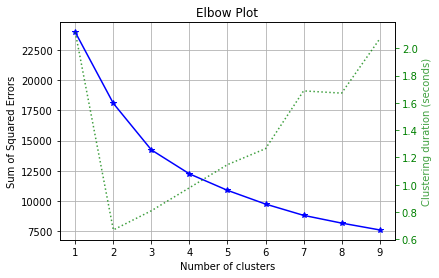

In [24]:
skplt.cluster.plot_elbow_curve(clustering_kmeans, standardized_df, cluster_ranges=range(1, 10))
plt.show()

### KMeans clustering (k=8)

In [25]:
k = 8

In [26]:
clustering_kmeans = KMeans(n_clusters=k, n_init=10, random_state=886)
#default values: n_clusters=8; n_init=10; 
clustering_kmeans.fit(standardized_df)

KMeans(random_state=886)

In [27]:
clustering_kmeans.inertia_

8147.049214332683

In [28]:
clustering_kmeans.cluster_centers_
df_centroids = pd.DataFrame(clustering_kmeans.cluster_centers_, columns=standardized_df.columns)
df_centroids

,Balance,BonusMiles,BonusTrans,DaysSinceEnroll,FlightMiles,FlightTrans
0,5.988544,2.090801,1.114535,1.169617,0.800236,1.105183
1,0.410319,0.159360,0.832719,0.021617,1.884679,1.928945
2,-0.349643,-0.582100,-0.757961,0.692474,-0.217866,-0.229288
3,0.755637,2.225757,1.120768,0.475456,-0.081220,-0.057001
4,-0.415792,-0.609378,-0.863853,-1.019054,-0.235512,-0.243491
5,0.284767,0.195896,0.465650,1.036520,-0.176504,-0.193233
6,0.768712,0.861701,2.494494,0.152801,5.838059,6.073200
7,-0.158421,0.082177,0.539966,-0.642569,-0.239158,-0.257326


In [29]:
np.unique(clustering_kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 46, 219, 881, 324, 962, 668,  54, 845], dtype=int64))

### Parallel plot

<AxesSubplot:>

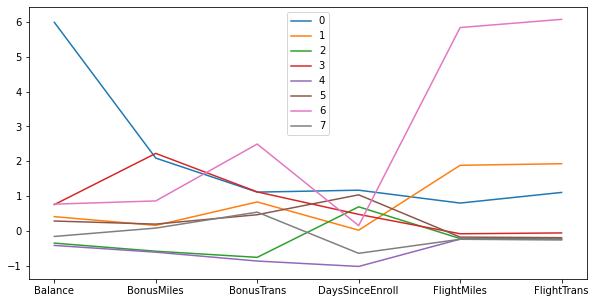

In [30]:
df_centroids.T.plot(figsize = (10,5))

### END